In [280]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [281]:
model = torch.load('../data storage/prm_data_L16_CNN_3.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-1.8087e-01, -1.3404e-01, -1.7477e-01, -1.2730e-01, -8.5787e-02],
                        [ 1.2064e-01,  1.6616e-01,  9.8739e-02, -9.4443e-02, -9.1051e-02],
                        [ 1.5324e-01, -7.7195e-05, -1.0908e-01, -1.0759e-01,  1.1646e-01],
                        [-2.4398e-02, -8.4529e-02, -4.7030e-02,  1.5826e-01, -4.5310e-02],
                        [ 1.1378e-01, -1.2767e-02,  1.5088e-01, -2.2611e-02,  2.2941e-02]]],
              
              
                      [[[ 2.8123e-01,  8.5876e-02,  2.0764e-01,  9.3350e-02,  2.7449e-01],
                        [ 1.2682e-01, -4.8348e-02,  1.2478e-01,  2.7798e-01,  1.6947e-01],
                        [ 1.4917e-01,  1.8722e-01,  2.7014e-02,  4.0357e-02,  1.3110e-02],
                        [-1.2337e-01,  1.3995e-01, -2.4064e-01,  1.7802e-01, -9.2390e-03],
                        [-4.5134e-02, -1.1146e-01, -1.4294e-01, -2.1168e-01, -1.0513e-01]]],
              
          

In [282]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-1.8087e-01, -1.3404e-01, -1.7477e-01, -1.2730e-01, -8.5787e-02],
          [ 1.2064e-01,  1.6616e-01,  9.8739e-02, -9.4443e-02, -9.1051e-02],
          [ 1.5324e-01, -7.7195e-05, -1.0908e-01, -1.0759e-01,  1.1646e-01],
          [-2.4398e-02, -8.4529e-02, -4.7030e-02,  1.5826e-01, -4.5310e-02],
          [ 1.1378e-01, -1.2767e-02,  1.5088e-01, -2.2611e-02,  2.2941e-02]]],


        [[[ 2.8123e-01,  8.5876e-02,  2.0764e-01,  9.3350e-02,  2.7449e-01],
          [ 1.2682e-01, -4.8348e-02,  1.2478e-01,  2.7798e-01,  1.6947e-01],
          [ 1.4917e-01,  1.8722e-01,  2.7014e-02,  4.0357e-02,  1.3110e-02],
          [-1.2337e-01,  1.3995e-01, -2.4064e-01,  1.7802e-01, -9.2390e-03],
          [-4.5134e-02, -1.1146e-01, -1.4294e-01, -2.1168e-01, -1.0513e-01]]],


        [[[ 1.7638e-01,  6.0856e-02,  2.8594e-01,  1.8590e-01, -2.6023e-02],
          [ 2.0420e-01, -1.6351e-01, -3.6486e-02,  2.0785e-01,  2.7880e-01],
          [-4.7544e-02, -1.2654e-01, -1.9507e-01, -1.4167e-01,  2.56

In [283]:
conv1_weight.size()

torch.Size([5, 1, 5, 5])

In [284]:
# conv1_weight_flat = conv1_weight.sum(dim=(2, 3))
# print(conv1_weight_flat)

In [285]:
# conv1_weight_flat_a, index = torch.sort(conv1_weight_flat, dim=0 , descending=True)
# conv1_weight_flat_a, index

In [286]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

横ver

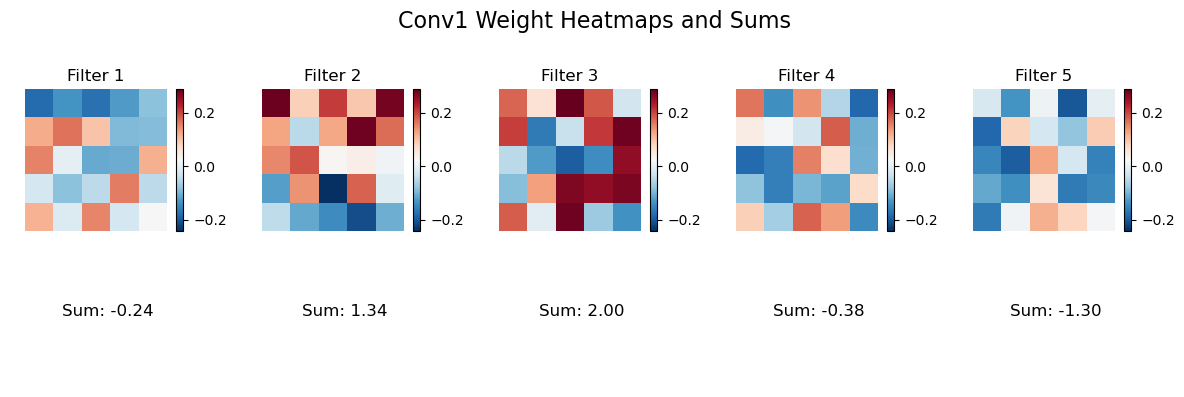

In [287]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# カラーマップの最小値を0以下に設定
min_value = min(np.min(conv1_weight_np), 0)
# 単一の最大値を取得
max_value = np.amax(conv1_weight_np)

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
    plt.colorbar()
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 図をファイルとして保存
# plt.savefig('../image storage/L16_CNN_filter.png')
plt.show()


縦ver

In [288]:
# # 各重みフィルターに対して成分の和を計算
# filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# # カラーマップの最小値を0以下に設定
# min_value = min(np.min(conv1_weight_np), 0)
# # 単一の最大値を取得
# max_value = np.amax(conv1_weight_np)

# # グリッドの行数と列数を設定
# num_rows = 5
# num_cols = 2

# # フィギュアを作成
# plt.figure(figsize=(9, 12))

# for i in reversed(range(5)):
#     # ヒートマップを描画
#     plt.subplot(num_rows, num_cols, (4 - i) * num_cols + 1)
#     plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
#     plt.colorbar()
#     plt.title(f'Filter {i + 1}')
#     plt.axis('off')

# # plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# # 図をファイルとして保存
# plt.savefig('../image storage/L16_CNN_filter.png')
# plt.show()


In [289]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.0292,  0.0396,  0.0436,  ..., -0.0798,  0.0107, -0.0218],
        [-0.0692,  0.0208, -0.0263,  ..., -0.0294, -0.0792,  0.0003],
        [ 0.0501,  0.0287, -0.0270,  ..., -0.0825, -0.0438,  0.0377],
        ...,
        [ 0.0002, -0.0106, -0.0670,  ..., -0.0748, -0.0609,  0.0270],
        [ 0.0142, -0.0577, -0.0569,  ...,  0.0176, -0.0614,  0.0013],
        [ 0.0405,  0.0281,  0.0254,  ..., -0.0120, -0.0293, -0.0475]])

In [290]:
fc_weight.size()

torch.Size([100, 320])

In [291]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [292]:
fc_weight_np_square

array([[ 0.02923472, -0.06918955,  0.05011972, ...,  0.00017543,
         0.0142394 ,  0.04050488],
       [ 0.0396365 ,  0.02081186,  0.02869906, ..., -0.01062299,
        -0.05767123,  0.02808072],
       [ 0.04364755, -0.0262647 , -0.02704951, ..., -0.06703289,
        -0.05689797,  0.02541544],
       ...,
       [-0.07975059, -0.02936899, -0.08253122, ..., -0.07478703,
         0.01760601, -0.01197481],
       [ 0.0107284 , -0.07924432, -0.04379835, ..., -0.06094865,
        -0.06136877, -0.02927709],
       [-0.02179841,  0.00033492,  0.03769723, ...,  0.02704215,
         0.00133333, -0.04745984]], dtype=float32)

In [293]:
fc_weight_np_square.shape

(320, 100)

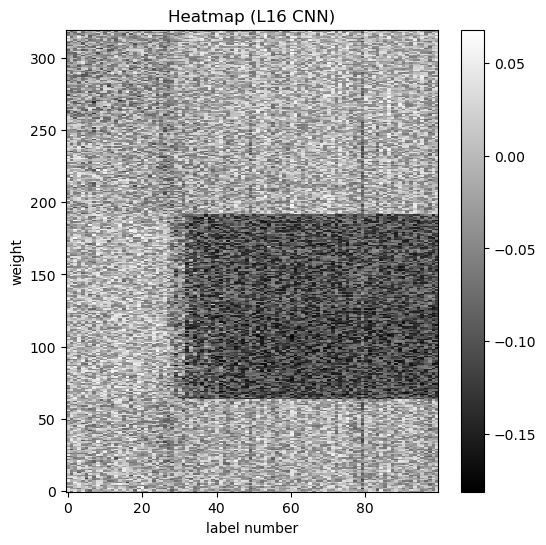

In [294]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 CNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
# plt.savefig('../image storage/L16_CNN_weight.png')

plt.show()

In [295]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -4.137315 ,  -5.3068857,  -4.073087 ,  -3.34876  ,  -5.505458 ,
        -6.3961763,  -5.812546 ,  -7.432581 ,  -2.098435 ,  -5.008533 ,
        -4.8776608,  -6.722169 ,  -3.9599218,  -3.460535 ,  -2.3572345,
        -4.179465 ,  -4.0126762,  -5.676476 ,  -5.0273137,  -3.5528936,
        -3.9039617,  -6.2660465,  -5.946147 ,  -5.1474485,  -5.3889093,
        -8.254914 ,  -7.676414 , -10.207774 , -11.70349  , -11.583459 ,
        -9.270596 , -11.16618  , -15.5203085, -12.981062 , -17.443874 ,
       -16.032007 , -14.593987 , -15.353816 , -14.2882805, -16.421925 ,
       -14.362487 , -13.8395605, -16.73336  , -17.271904 , -16.511189 ,
       -14.355561 , -15.307588 , -15.614917 , -15.650961 , -19.059624 ,
       -16.40067  , -13.603538 , -16.55942  , -13.431586 , -15.600285 ,
       -17.326797 , -17.47012  , -15.558056 , -15.332409 , -17.210264 ,
       -12.967054 , -15.029472 , -17.182823 , -16.205648 , -15.780561 ,
       -14.78679  , -15.815628 , -16.417892 , -14.311006 , -13.9

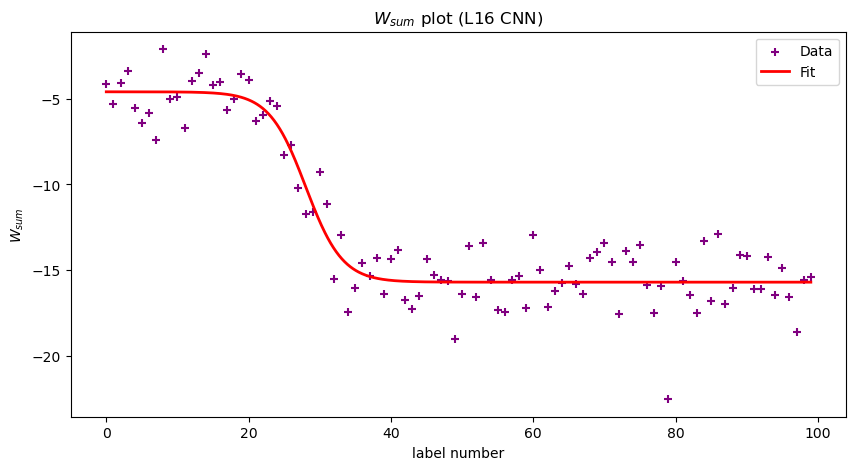

Fitted Parameters:
a: -5.563037808512474
b: 0.19417237081333072
c: -5.443480515917502
d: -10.149866386577255


In [296]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L16 CNN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
# plt.savefig('../image storage/L16_CNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [297]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 28.034269206872064
beta: 0.42653954914644143
